# RESULTS OF POLISH PARLIAMENTARY ELECTIONS - CLASSIFIERS COMPARISON

### AIM OF THE PROJECT
This project was an attempt to train a model which would successfully classify respondents to parties they voted for in polish parliamentary elections in 2015 based on a set of variables available in European Social Survey, round 8, from 2017 (data collection took place in 2016).

### DATASET USED
European Social Survey Round 8 (2017) dataset was used. 

Source: https://www.kaggle.com/pascalbliem/european-social-survey-ess-8-ed21-201617/download

### SUMMARY OF THE PROJECT

#### DATA CLEANING

1. The dataset was limited to variables and samples containing valid data for Poland. In one of the first steps, all redundant variables were removed - due to various reasone, e.g. not applying directly to the respondent(like "Gender of the 3rd person in household").
2. In the next step, variables were grouped due their scale type: Nominal, Ordinal, Binary, Continuous. Depending on modification needed, appropriate approach was applied (e.g. for selected nominal variables One Hot Encoding was applied.

For details go to PolandParliamentaryElections_DataCleaning file available at:

https://github.com/jasieq9191/PolandParliamentaryElections

#### MODELLING

1. As a first step, data was splitted into train and test sets.
2. Standard scaling on both train and test (separately). was performed.
3. Using GridSearchCV on scaled data, best Logistic Regression model hyperparameters were found.
4. The model was next used in RFECV procedure which limited the dataset to 18 variables (of 125 at the beggining).
5. Numerous models were fitted: Logistic Regression, SVM, Decision Tree Classifier, Random Forest Classifier, Ada Boosting Classifier, Gradient Boosting Classifier, KNeighbours Classifier, soft and hard Voting Classifier. From among all of them, Gradient Boosting Classifier turned out to be the best when looking at f1 score with weighted averaging method (0.48). It was followed by Voting Classifiers (Gradient Boosting Classifier with the best hyperparameters was also used to fit them), SVM, and Linear Regression. In general though, most classifiers reached relatively similar scores. The only exception is Decision Tree Classifier which closed the list with just 0.41 f1 score.
6. Looking at feature importances for Gradient Boosting Classifier, one can notice the highest importance of the overall satisfaction with the national government. It is followed by respondent's age, religiousness, and self-placement on left-right scale. Features describing respondent's attitude towards European Union are also among the most important ones.
7. In general, the scores achieved by the models with the best hyperparameters are actually quite low. As a step to better the models, different approach to features selection could be applied. Some of the features skipped at the preliminary data cleaning stage, could be used, as well as different model (e.g. Random Forest Classifier) could be used with RFECV method. One could also think of setting features number in RFECV once seeing the scores for models with given number of features - to assesss where should be the cut-off point in terms of accuracy incremental (as one could see in the final overview of the most important features, some of them didn't play any role for the best model). 


# Table of Contents

### 1. Importing packages

### 2. 2. Importing pickled files

### 3. Train-test split

### 4. Standard Scaling

### 5. GridSearchCV - Logistic Regression

### 6. RFECV

### 7. Fitting best models
#### 7.1 Logistic Regression
#### 7.2 SVM
#### 7.3 Decision Tree Classifier
#### 7.4 Random Forest Classifier
#### 7.5 Ada Boosting Classifier
#### 7.6 Gradient Boosting Classifier
#### 7.7 K Neighbours Classifier
#### 7.8 Voting Classifier - soft
#### 7.9 Voting Classifier - hard
#### 7.10 Summarizing classifiers' scores


### 8. Most important variables for the best model - Gradient Boosting Classifier 

## 1. Importing packages

In [96]:
# Importing all necessary packages

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [3]:
# Changing display options 
pd.set_option('display.max_columns', None)

## 2. Importing pickled files

### Cleaned data prepared in PolandParliamentaryElections_Data Cleaning file

In [4]:
# importing pickled data
file = open('plik', 'rb')
data = pickle.load(file)
file.close()

### Fitted models 

In [ ]:
# Basic model
file = open('model1', 'rb')
clf_basic = pickle.load(file)
file.close()

In [18]:
# Basic grid_search on scaled data
file = open('grid_search_log_reg_scaled', 'rb')
grid_search = pickle.load(file)
file.close()

In [ ]:
# rfecv
file = open('rfecv', 'rb')
rfecv = pickle.load(file)
file.close()

Best models

In [22]:
# Logistic Regression
file = open('grid_log_reg', 'rb')
grid_log_reg = pickle.load(file)
file.close()

In [37]:
# SVM
file = open('grid_svm', 'rb')
grid_svm = pickle.load(file)
file.close()

In [42]:
# DecisionTreeClassifier
file = open('grid_dtc', 'rb')
grid_dtc = pickle.load(file)
file.close()

In [48]:
# RandomForestClassifier
file = open('grid_rf', 'rb')
grid_rf = pickle.load(file)
file.close()

In [54]:
# AdaBoosting
file = open('grid_ada', 'rb')
grid_ada = pickle.load(file)
file.close()

In [61]:
# GradientBoosting
file = open('grid_grad', 'rb')
grid_grad = pickle.load(file)
file.close()

In [69]:
# KNeighboursClassifier
file = open('grid_knn', 'rb')
grid_knn = pickle.load(file)
file.close()

In [70]:
# VotingClassifier - hard
file = open('voting_clf_hard', 'rb')
voting_clf_hard = pickle.load(file)
file.close()

In [75]:
# VotingClassifier - soft
file = open('voting_clf_soft', 'rb')
voting_clf_soft = pickle.load(file)
file.close()

In [125]:
# Clf_grad - best Gradient Boosting Classifier
file = open('clf_grad', 'rb')
clf_grad = pickle.load(file)
file.close()

# 3. Train-test split

In [5]:
X = data.drop(["Party voted for in last national election, Poland"], axis=1)
y = data["Party voted for in last national election, Poland"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)

In [10]:
# a model without any changes
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Train set f1 score: {:.2f}".format(metrics.f1_score(y_train, clf.predict(X_train), average='weighted')))

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train set f1 score: 0.74


In [242]:
y_test.value_counts(normalize=True)

6.0    0.385714
4.0    0.271429
2.0    0.085714
5.0    0.066667
8.0    0.061905
3.0    0.061905
1.0    0.042857
9.0    0.023810
Name: Party voted for in last national election, Poland, dtype: float64

Most frequent class, 6 (Law and Justice) was voted for by 38.6 of respondents.

# 4. Standard Scaling

In [11]:
# preprocessing using 0-1 scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [26]:
# learning a Logistic Regression model on the scaled training data
clf_log_reg_scaled = LogisticRegression()
clf_log_reg_scaled.fit(X_train_scaled, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print("Train set f1 score: {:.2f}".format(metrics.f1_score(y_train,
    clf_log_reg_scaled.predict(X_train_scaled), average='weighted')))

Train set f1 score: 0.76


As one can see, standard scaling slightly improves the model.

# 5. GridSearchCV - Logistic Regression 

The next step will be finding a best hyperparameters of Logistic Regression model in order to use that model in RFECV method.

In [16]:
# Setting seed and kfold for cross-validation within GridSearch

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [17]:
# Finding the best hyperparameters
param_grid = [{'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'class_weight': ['balanced', None]
}]

clf = LogisticRegression()

grid_search = GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(X_train_scaled, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: Fu

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: Fu

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'class_weight': ['balanced', None],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [23]:
print("Train set f1 score: {:.2f}".format(metrics.f1_score(y_train,
    grid_search.predict(X_train_scaled), average='weighted')))

Train set f1 score: 0.58


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV lowers f1 score which might suggest that the result for Logistic Regression on scaled data is overfitted. 

In [19]:
# Displaying best parameters
grid_search.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

In [243]:
# Setting best parameters
clf_log_reg_scaled_best_param = LogisticRegression(**grid_search.best_params_)

# 6. RFECV

The Logistic Regression model with the best hyperparameters will be used to limit the number of variables using RFECV method.

In [31]:
rfecv = RFECV(estimator=clf_log_reg_scaled_best_param, step=1, cv=kfold)

In [32]:
rfecv.fit(X_train_scaled, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

RFECV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
      estimator=LogisticRegression(C=0.1, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l1', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [34]:
# Listing selected variables
X_train_scaled.columns[rfecv.get_support()].to_list()

['Age of respondent, calculated',
 'Most of the time people helpful or mostly looking out for themselves',
 'Trust in the European Parliament',
 'Placement on left right scale',
 'How satisfied with the national government',
 'State of education in country nowadays',
 'European Union: European unification go further or gone too far',
 'How emotionally attached to Europe',
 'How religious are you',
 "Standard of living for the old, governments' responsibility",
 'Legal marital status, post coded_1',
 'Main source of household income_3',
 "Domicile, respondent's description_1",
 'Worked in another organisation or association last 12 months',
 'Signed petition last 12 months',
 'Posted or shared anything about politics online last 12 months',
 'Would vote for [country] to remain member of European Union or leave',
 'Religion or denomination belonging to at present, Poland']

In [36]:
# Creating a dataset consisting of the best variables for both train and test sets
X_train_best_features = X_train_scaled.iloc[:,rfecv.get_support()]
X_test_best_features = X_test_scaled.iloc[:,rfecv.get_support()]

In [39]:
# Checking train set accuracy
clf.fit(X_train_best_features, y_train)
print("Train set accuracy: {:.2f}".format(clf.score(X_train_best_features, y_train)))
print("Train set f1 score: {:.2f}".format(metrics.f1_score(y_train,
    clf.predict(X_train_best_features), average='weighted')))

Train set accuracy: 0.65
Train set f1 score: 0.60


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model with less variables has lower f1 score than the full one which may once again suggest the full model was overfitted.

# 7. Fitting best models

   ## 7.1 Logistic Regression

First, Logistic Regression model will be fitted using GridSearchCV.

In [40]:
param_grid = [{'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'class_weight': ['balanced', None]
}]

clf_log_reg = LogisticRegression()

grid_log_reg = GridSearchCV(clf_log_reg, param_grid, cv=kfold)
grid_log_reg.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'class_weight': ['balanced', None],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [152]:
print("Train set accuracy: {:.2f}".format(grid_log_reg.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_log_reg.score(X_test_best_features, y_test)))
clf1_train = metrics.f1_score(y_train,
    grid_log_reg.predict(X_train_best_features), average='weighted')
clf1_test = metrics.f1_score(y_test,
    grid_log_reg.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf1_train))
print("Test set f1 score: {:.2f}".format(clf1_test))

Train set accuracy: 0.63
Test set accuracy: 0.56
Train set f1 score: 0.56
Test set f1 score: 0.46


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Again, f1 score for Logistic Regression model with the best hyperparameters selected using GridSearchCV is slightly lower than the model fitted without cross-validation. This might be a sign that the further one was overfitted.

In [50]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_log_reg.best_estimator_))

Best estimator:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Setting parameters of the best model - it will be used later on in Voting Classifier

In [92]:
clf_log_reg.set_params(**grid_log_reg.best_params_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 7.2 SVM

In [45]:
# The process is being repeated for SVM.

In [46]:
param_grid = [{ 
                "kernel": ["linear", "rbf", "poly"],
                "gamma": ["auto"],
                "C": [0.1, 0.5, 1, 5, 10, 50, 100],
                "degree": [1, 2, 3, 4, 5, 6]
}]

clf_svm = SVC()

grid_svm = GridSearchCV(clf_svm, param_grid, cv=kfold)
grid_svm.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10, 50, 100],
                          'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['auto'],
                          'kernel': ['linear', 'rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
print("Train set accuracy: {:.2f}".format(grid_svm.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_svm.score(X_test_best_features, y_test)))
clf2_train = metrics.f1_score(y_train,
    grid_svm.predict(X_train_best_features), average='weighted')
clf2_test = metrics.f1_score(y_test,
    grid_svm.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf2_train))
print("Test set f1 score: {:.2f}".format(clf2_test))

Train set accuracy: 0.65
Test set accuracy: 0.55
Train set f1 score: 0.58
Test set f1 score: 0.47


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_svm.best_estimator_))

Best estimator:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


F1 score for SVM is slightly higher than for Logistic Regression both in case of train and test f1score, the difference is not big, though.

Setting parameters of the best model - it will be used later on in Voting Classifier

In [93]:
clf_svm.set_params(**grid_svm.best_params_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 7.3 Decision Tree Classifier

GridSearchCV for Decision Tree Classifier.

In [51]:
param_grid = [{ 
                "criterion" :["gini", "entropy"],
                "class_weight": [None, "balanced"],
                "max_features": ["auto", "sqrt", "log2"],
                "max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
}]

clf_dtc = DecisionTreeClassifier()

grid_dtc = GridSearchCV(clf_dtc, param_grid, cv=kfold)
grid_dtc.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              pres...
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'class_weight': [None, 'balanced'],
                          'c

In [154]:
print("Train set accuracy: {:.2f}".format(grid_dtc.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_dtc.score(X_test_best_features, y_test)))
clf3_train = metrics.f1_score(y_train,
    grid_dtc.predict(X_train_best_features), average='weighted')
clf3_test = metrics.f1_score(y_test,
    grid_dtc.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf3_train))
print("Test set f1 score: {:.2f}".format(clf3_test))

Train set accuracy: 0.59
Test set accuracy: 0.51
Train set f1 score: 0.50
Test set f1 score: 0.41


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_dtc.best_estimator_))

Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Decision tree classifier gives visibly worse results compared to both Logistic Regression and SVM considering f1 score.

## 7.4 Random Forest Classifier

GridSearchCV for Random Forest Classifier.

In [60]:
param_grid = [{ 
                "n_estimators": [200],
                "class_weight": [None, "balanced"],
                "max_features": ["auto", "sqrt", "log2"],
                "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8],
                "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                "criterion" :["gini", "entropy"]     ,
                "n_jobs": [-1]
}]

clf_rf = RandomForestClassifier()

grid_rf = GridSearchCV(clf_rf, param_grid, cv=kfold)
grid_rf.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fract...
             iid='warn', n_jobs=None,
             param_grid=[{'class_weight': [None, 'balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             

In [155]:
print("Train set accuracy: {:.2f}".format(grid_rf.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_rf.score(X_test_best_features, y_test)))
clf4_train = metrics.f1_score(y_train,
    grid_rf.predict(X_train_best_features), average='weighted')
clf4_test = metrics.f1_score(y_test,
    grid_rf.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf4_train))
print("Test set f1 score: {:.2f}".format(clf4_test))

Train set accuracy: 0.69
Test set accuracy: 0.54
Train set f1 score: 0.63
Test set f1 score: 0.45


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_rf.best_estimator_))

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.005, min_samples_split=0.005,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


Random Forest Classifier gives better results than Decision Tree Classifier, but worse than both SVM and Logistic Regression for test set, despite better result for train set.

## 7.5 AdaBoosting

GridSearchCV for AdaBoosting.

In [65]:
param_grid = [{ 
                "base_estimator": [DecisionTreeClassifier(max_depth = i) for i in range(1,6)],
                "n_estimators": [200],
                "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0],
                "algorithm": ["SAMME.R"]
}]

clf_ada = AdaBoostClassifier()

grid_ada = GridSearchCV(clf_ada, param_grid, cv=kfold)
grid_ada.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'algorithm': ['SAMME.R'],
                          'base_estimator': [DecisionTreeClassifier(class_weight=None,
                                                                    cr...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                                    min_samples_le

In [156]:
print("Train set accuracy: {:.2f}".format(grid_ada.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_ada.score(X_test_best_features, y_test)))
clf5_train = metrics.f1_score(y_train,
    grid_ada.predict(X_train_best_features), average='weighted')
clf5_test = metrics.f1_score(y_test,
    grid_ada.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf5_train))
print("Test set f1 score: {:.2f}".format(clf5_test))

Train set accuracy: 0.96
Test set accuracy: 0.52
Train set f1 score: 0.96
Test set f1 score: 0.45


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_ada.best_estimator_))

Best estimator:
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
             

AdaBoosting gives very high f1score for train set, but in case of test set the result is similar to Random Forest Classifier, but worse than SVM and Logistic Regression.

## 7.6 Gradient Boosting

GridSearchCV for Gradient Boosting.

In [68]:
param_grid = [{ 
                "learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                "n_estimators": [200],
                "max_depth": [2,3,4,5,6],
                "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                "max_features": ["auto", "sqrt", "log2"],
                "subsample": [0.8, 0.9, 1]
}]

clf_grad = GradientBoostingClassifier()

grid_grad = GridSearchCV(clf_grad, param_grid, cv=kfold)
grid_grad.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=...
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005,
                                            0.001],
                          'max_depth': [2,

In [157]:
print("Train set accuracy: {:.2f}".format(grid_grad.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_grad.score(X_test_best_features, y_test)))
clf6_train = metrics.f1_score(y_train,
    grid_grad.predict(X_train_best_features), average='weighted')
clf6_test = metrics.f1_score(y_test,
    grid_grad.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf6_train))
print("Test set f1 score: {:.2f}".format(clf6_test))

Train set accuracy: 0.94
Test set accuracy: 0.55
Train set f1 score: 0.94
Test set f1 score: 0.48


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_grad.best_estimator_))

Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.005, min_samples_split=0.01,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [94]:
clf_grad.set_params(**grid_grad.best_params_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.005, min_samples_split=0.01,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Gradient Boosting Classifier gives high f1score results for train test and the best result for test set.

## 7.7 KNeareastNeighbours

GridSearchCV for KNeareastNeigbours.

In [73]:
param_grid = [{ 
                "n_neighbors": list(range(1,18)),
                "p": [1, 2, 3, 4, 5],
                "leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                "n_jobs": [-1]
}]

clf_knn = KNeighborsClassifier()

grid_knn = GridSearchCV(clf_knn, param_grid, cv=kfold)
grid_knn.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                          'n_jobs': [-1],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17],
                          'p': [1, 2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [158]:
print("Train set accuracy: {:.2f}".format(grid_knn.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(grid_knn.score(X_test_best_features, y_test)))
clf7_train = metrics.f1_score(y_train,
    grid_knn.predict(X_train_best_features), average='weighted')
clf7_test = metrics.f1_score(y_test,
    grid_knn.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf7_train))
print("Test set f1 score: {:.2f}".format(clf7_test))

Train set accuracy: 0.62
Test set accuracy: 0.52
Train set f1 score: 0.57
Test set f1 score: 0.45


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
# Displaying the best hyperparameters
print("Best estimator:\n{}".format(grid_knn.best_estimator_))

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='uniform')


KNN gives similar results to Random Forest Classifier for test set.

## 7.8 VotingClassifier - soft

Soft voting classifier consisting of 3 best classifiers: LogisticRegression, GradientBoosting, SupportVectorClassifier.

In [114]:
clf_svm.set_params(probability=True)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [127]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', clf_log_reg), ('gb', clf_grad), ('svc', clf_svm)], voting='soft')
voting_clf_soft.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('gb',
                              GradientBoostingClassifier(criterion='friedman_mse',
                                                         init=None,
                                                         learning_r...
                                

In [159]:
print("Train set accuracy: {:.2f}".format(voting_clf_soft.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(voting_clf_soft.score(X_test_best_features, y_test)))
clf8_train = metrics.f1_score(y_train,
    voting_clf_soft.predict(X_train_best_features), average='weighted')
clf8_test = metrics.f1_score(y_test,
    voting_clf_soft.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf8_train))
print("Test set f1 score: {:.2f}".format(clf8_test))

Train set accuracy: 0.75
Test set accuracy: 0.57
Train set f1 score: 0.71
Test set f1 score: 0.48


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Voting Classifier gives the same result as Gradient Boosting for test set.

## 7.9 VotingClassifier - hard

Hard voting classifier consisting of 3 best classifiers: LogisticRegression, RandomForestClassifier, SupportVectorClassifier.

In [123]:
voting_clf_hard = VotingClassifier(
    estimators=[('lr', clf_log_reg), ('grad', clf_grad), ('svc', clf_svm)], voting='hard')
voting_clf_hard.fit(X_train_best_features, y_train)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              GradientBoostingClassifier(criterion='friedman_mse',
                                                         init=None,
                                                         learning_r...
                                

In [160]:
print("Train set accuracy: {:.2f}".format(voting_clf_hard.score(X_train_best_features, y_train)))
print("Test set accuracy: {:.2f}".format(voting_clf_hard.score(X_test_best_features, y_test)))
clf9_train = metrics.f1_score(y_train,
    voting_clf_hard.predict(X_train_best_features), average='weighted')
clf9_test = metrics.f1_score(y_test,
    voting_clf_hard.predict(X_test_best_features), average='weighted')
print("Train set f1 score: {:.2f}".format(clf9_train))
print("Test set f1 score: {:.2f}".format(clf9_test))

Train set accuracy: 0.68
Test set accuracy: 0.56
Train set f1 score: 0.62
Test set f1 score: 0.46


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Result for hard Voting Classifier is slightly worse than for soft.

## 7.10 Summarizing classifiers' scores

In [200]:
cols = ['Method','train_f1_score', 'test_f1_score']
results = pd.DataFrame(columns=cols)

In [201]:
results = results.append(pd.DataFrame({"Method": ["LogisticRegression", "SVM", "DecisionTreeClassifier",
                            "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier",
                                       "KNeighboursClassifier", "Voting Classifier - soft", "VotingClassifier - hard"],
                            "train_f1_score": [clf1_train, clf2_train, clf3_train, clf4_train, clf5_train,
                                              clf6_train, clf7_train, clf8_train, clf9_train],
                            "test_f1_score": [clf1_test, clf2_test, clf3_test, clf4_test, clf5_test, clf6_test,
                                             clf7_test, clf8_test, clf9_test]}))

results = results.sort_values(by='test_f1_score', ascending=False)
results = results.round(2)
results

,Method,train_f1_score,test_f1_score
5,GradientBoostingClassifier,0.94,0.48
7,Voting Classifier - soft,0.71,0.48
1,SVM,0.58,0.47
8,VotingClassifier - hard,0.62,0.46
0,LogisticRegression,0.56,0.46
4,AdaBoostClassifier,0.96,0.45
3,RandomForestClassifier,0.63,0.45
6,KNeighboursClassifier,0.57,0.45
2,DecisionTreeClassifier,0.50,0.41


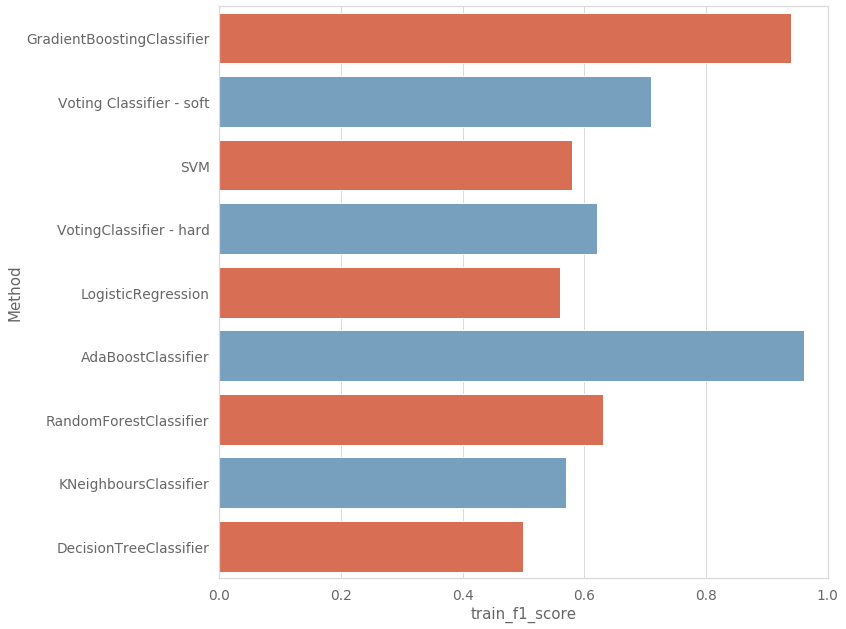

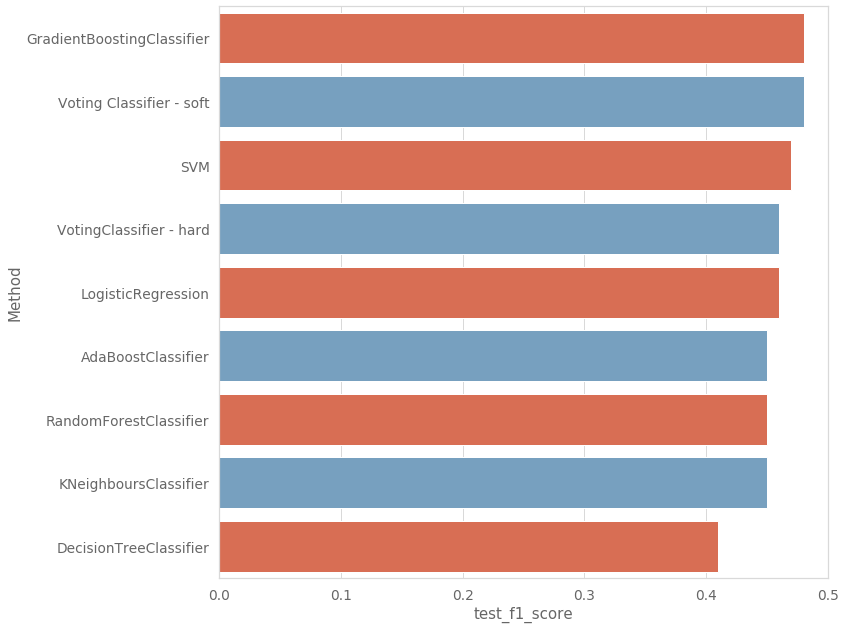

In [241]:
#### GRAPH 1 - TRAIN

sns.set(font_scale = 1.25)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

training_color = sns.color_palette("RdYlBu", 10)[1]
test_color = sns.color_palette("RdYlBu", 10)[-2]
colors = [training_color, test_color]

f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="train_f1_score", y="Method", palette = colors,
            data=results)

ax.axvline(x = -1, color = 'black', linewidth = 4, alpha = .7)

plt.xlim(0, 1)

plt.tight_layout()

plt.show()

#### GRAPH 2 - TEST

sns.set(font_scale = 1.25)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

training_color = sns.color_palette("RdYlBu", 10)[1]
test_color = sns.color_palette("RdYlBu", 10)[-2]
colors = [training_color, test_color]

f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="test_f1_score", y="Method", palette = colors,
            data=results)

ax.axvline(x = -1, color = 'black', linewidth = 4, alpha = .7)

plt.xlim(0, 0.5)

plt.tight_layout()

plt.show()

The most efficient method used was Gradient Boosting Classifier. Hence, it will be used to take a look at the most important variables in the model.

# 8. Most important variables for the best model - Gradient Boosting Classifier 

In [226]:
clf_grad.fit(X_train_best_features, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.005, min_samples_split=0.01,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [236]:
best_variables = pd.DataFrame({"Variable": X_train_best_features.columns,
                               "Score": clf_grad.feature_importances_})
best_variables = best_variables.sort_values(by="Score",ascending=False)
best_variables = best_variables.round(2)
best_variables

,Variable,Score
4,How satisfied with the national government,0.27
3,Placement on left right scale,0.14
0,"Age of respondent, calculated",0.12
8,How religious are you,0.07
6,European Union: European unification go furthe...,0.06
2,Trust in the European Parliament,0.06
5,State of education in country nowadays,0.06
7,How emotionally attached to Europe,0.05
1,Most of the time people helpful or mostly look...,0.05
9,"Standard of living for the old, governments' r...",0.05


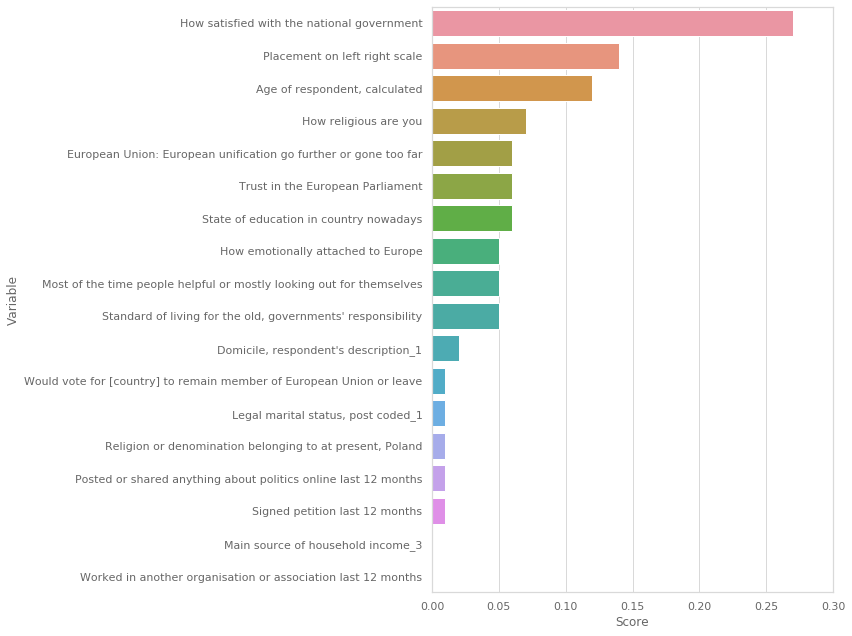

In [240]:
#### GRAPH

sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

f, ax = plt.subplots(figsize=(12, 9))

sns.barplot(x="Score", y="Variable",
            data=best_variables)

ax.axvline(x = -1, color = 'black', linewidth = 4, alpha = .7)

plt.xlim(0, 0.3)

plt.tight_layout()

plt.show()

What is interesting, in overall, the most important variable is satisfaction with the national government. High place holds also self-perception on left-right scale. Among socio-demographic variables religiousness and age also play an important role.  